In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import nltk

In [ ]:
# Reading datasets
df = pd.read_csv('/content/Corona_NLP_test.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [ ]:
print('unique values',df['Sentiment'].unique())

unique values ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']


<Axes: xlabel='Sentiment', ylabel='count'>

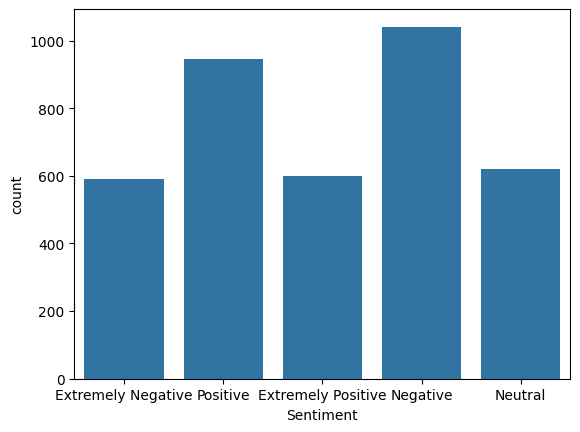

In [ ]:
sns.countplot(x = 'Sentiment',data=df)

In [ ]:
df['Sentiment'] = df['Sentiment'].map({'Neutral':0,'Positive':1,'Negative':-1,'Extremely Positive':2,'Extremely Negative':-2})
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,-2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,-1
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,1
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,-1
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,0
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,-2


In [ ]:
# Dropping Unneccessary columns that won't help prediction

cols = ['UserName','ScreenName','Location','TweetAt']
df.drop(cols,axis=1, inplace=True)
df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,-2
1,When I couldn't find hand sanitizer at Fred Me...,1
2,Find out how you can protect yourself and love...,2
3,#Panic buying hits #NewYork City as anxious sh...,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,1
3794,Did you panic buy a lot of non-perishable item...,-1
3795,Asst Prof of Economics @cconces was on @NBCPhi...,0
3796,Gov need to do somethings instead of biar je r...,-2


In [ ]:
# Converting the text data into numerical data
tweet = df.OriginalTweet
tweet

0       TRENDING: New Yorkers encounter empty supermar...
1       When I couldn't find hand sanitizer at Fred Me...
2       Find out how you can protect yourself and love...
3       #Panic buying hits #NewYork City as anxious sh...
4       #toiletpaper #dunnypaper #coronavirus #coronav...
                              ...                        
3793    Meanwhile In A Supermarket in Israel -- People...
3794    Did you panic buy a lot of non-perishable item...
3795    Asst Prof of Economics @cconces was on @NBCPhi...
3796    Gov need to do somethings instead of biar je r...
3797    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 3798, dtype: object

In [ ]:
# Removing the extra charecters and other for appropriate prediction
tweet = tweet.str.replace('^[a-zA_Z0-9]+',' ')
tweet = tweet.str.replace('#',' ')
tweet = tweet.str.replace('-',' ')

tweet

<ipython-input-8-4761ae6612ce>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('^[a-zA_Z0-9]+',' ')


0       TRENDING: New Yorkers encounter empty supermar...
1       When I couldn't find hand sanitizer at Fred Me...
2       Find out how you can protect yourself and love...
3        Panic buying hits  NewYork City as anxious sh...
4        toiletpaper  dunnypaper  coronavirus  coronav...
                              ...                        
3793    Meanwhile In A Supermarket in Israel    People...
3794    Did you panic buy a lot of non perishable item...
3795      Prof of Economics @cconces was on @NBCPhilad...
3796    Gov need to do somethings instead of biar je r...
3797    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 3798, dtype: object

In [ ]:
# stemming - removing the tails or identify root word
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
# tokenize - converting to tokens
from nltk import TweetTokenizer
tk = TweetTokenizer()
tweet = tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
data_vec = vec.fit_transform(tweet)
print(data_vec)

  (0, 5191)	0.2879563165254327
  (0, 4347)	0.2879563165254327
  (0, 2252)	0.12599474467332122
  (0, 4791)	0.12667561824612553
  (0, 10014)	0.09118478564246896
  (0, 9067)	0.08451040345750661
  (0, 8643)	0.18384482051830298
  (0, 3781)	0.16329025596054908
  (0, 2517)	0.06586845300244243
  (0, 1138)	0.11140548240930705
  (0, 6112)	0.2879563165254327
  (0, 3957)	0.2879563165254327
  (0, 4396)	0.22760685137214728
  (0, 6959)	0.10414005575877686
  (0, 7047)	0.10457373142140917
  (0, 8842)	0.19906843783055683
  (0, 1730)	0.24576115784986005
  (0, 4967)	0.0662859998102502
  (0, 10384)	0.24576115784986005
  (0, 7378)	0.21587529751718046
  (0, 8599)	0.13152543864274224
  (0, 9202)	0.09745302266456735
  (0, 3462)	0.14164966184273034
  (0, 3475)	0.25709410731531945
  (0, 10787)	0.26460995651578106
  :	:
  (3797, 7636)	0.2143832394503655
  (3797, 10052)	0.24923652045922295
  (3797, 8102)	0.20151993043958327
  (3797, 8618)	0.1863895984053366
  (3797, 9570)	0.19662952732181063
  (3797, 6359)	0.22724

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


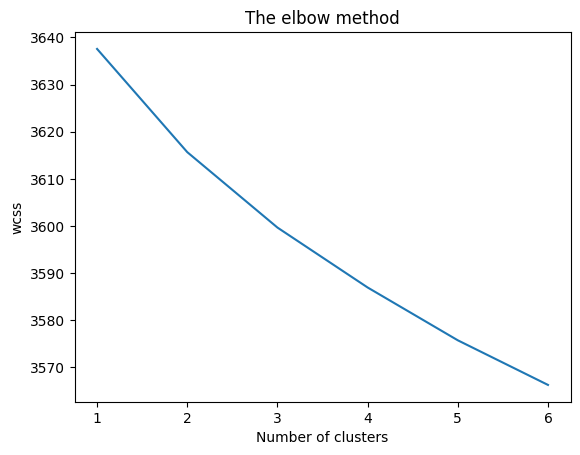

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data_vec)
  wcss.append(kmeans.inertia_)
plt.plot (range(1,7),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.savefig('elbow.png')
plt.show()
# wcss (within clusters sum of squares)

In [ ]:
kmeans =KMeans(n_clusters=4)
y = kmeans.fit_predict(data_vec)
y

array([3, 3, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
df['cluster'] = y

In [ ]:
df.head(20)

,OriginalTweet,Sentiment,cluster
0,TRENDING: New Yorkers encounter empty supermar...,-2,3
1,When I couldn't find hand sanitizer at Fred Me...,1,3
2,Find out how you can protect yourself and love...,2,2
3,#Panic buying hits #NewYork City as anxious sh...,-1,3
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0,3
5,Do you remember the last time you paid $2.99 a...,0,3
6,Voting in the age of #coronavirus = hand sanit...,1,3
7,"@DrTedros ""We cant stop #COVID19 without prot...",0,3
8,HI TWITTER! I am a pharmacist. I sell hand san...,-2,2
9,Anyone been in a supermarket over the last few...,2,3
